In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection  import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("college_student_management_data.csv")
df.head()


,student_id,age,gender,major,GPA,course_load,avg_course_grade,attendance_rate,enrollment_status,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate,risk_level
0,S001,24,Other,Computer Science,2.42,5,67.2,0.71,Graduated,32,33,0.70,8,0.74,High
1,S002,21,Male,Arts,3.73,6,64.4,0.84,Leave,29,53,0.91,13,0.85,Medium
2,S003,22,Male,Computer Science,2.80,3,95.3,0.89,Graduated,34,69,0.58,18,0.99,Medium
3,S004,24,Male,Arts,2.59,4,73.7,0.98,Graduated,22,18,0.91,6,0.72,Medium
4,S005,20,Other,Computer Science,2.30,4,87.4,0.95,Active,9,11,0.77,15,0.76,High


In [3]:

df.shape

(1545, 15)

In [4]:
df.columns

Index(['student_id', 'age', 'gender', 'major', 'GPA', 'course_load',
       'avg_course_grade', 'attendance_rate', 'enrollment_status',
       'lms_logins_past_month', 'avg_session_duration_minutes',
       'assignment_submission_rate', 'forum_participation_count',
       'video_completion_rate', 'risk_level'],
      dtype='object')

In [5]:
df.info

<bound method DataFrame.info of      student_id  age gender             major   GPA  course_load  \
0          S001   24  Other  Computer Science  2.42            5   
1          S002   21   Male              Arts  3.73            6   
2          S003   22   Male  Computer Science  2.80            3   
3          S004   24   Male              Arts  2.59            4   
4          S005   20  Other  Computer Science  2.30            4   
...         ...  ...    ...               ...   ...          ...   
1540      S1541   24   Male          Business  3.61            6   
1541      S1542   24  Other          Business  2.80            4   
1542      S1543   21   Male  Computer Science  3.61            5   
1543      S1544   22   Male              Arts  3.18            4   
1544      S1545   25  Other       Engineering  2.33            4   

      avg_course_grade  attendance_rate enrollment_status  \
0                 67.2             0.71         Graduated   
1                 64.4       

In [6]:
df.describe()

,age,GPA,course_load,avg_course_grade,attendance_rate,lms_logins_past_month,avg_session_duration_minutes,assignment_submission_rate,forum_participation_count,video_completion_rate
count,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,21.482848,3.012324,4.487379,79.914887,0.794460,19.344984,49.365049,0.752201,9.642718,0.750958
std,2.300287,0.571395,1.098163,11.528625,0.115142,11.515003,23.195192,0.144351,5.752493,0.144840
min,18.000000,2.000000,3.000000,60.000000,0.600000,0.000000,10.000000,0.500000,0.000000,0.500000
25%,19.000000,2.520000,4.000000,69.900000,0.690000,10.000000,29.000000,0.630000,5.000000,0.620000
50%,22.000000,3.030000,5.000000,79.600000,0.790000,19.000000,49.000000,0.760000,10.000000,0.750000
75%,23.000000,3.510000,5.000000,89.700000,0.890000,29.000000,70.000000,0.880000,15.000000,0.880000
max,25.000000,4.000000,6.000000,100.000000,1.000000,39.000000,89.000000,1.000000,19.000000,1.000000


In [7]:
df.isnull().sum()

student_id                      0
age                             0
gender                          0
major                           0
GPA                             0
course_load                     0
avg_course_grade                0
attendance_rate                 0
enrollment_status               0
lms_logins_past_month           0
avg_session_duration_minutes    0
assignment_submission_rate      0
forum_participation_count       0
video_completion_rate           0
risk_level                      0
dtype: int64

In [9]:
#all null columns add value automatically
for col in df.columns:
  if df[col].dtype =='object':
    df[col].fillna(df[col].mode()[0],inplace=True)
  else:
    df[col].fillna(df[col].mean(),inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

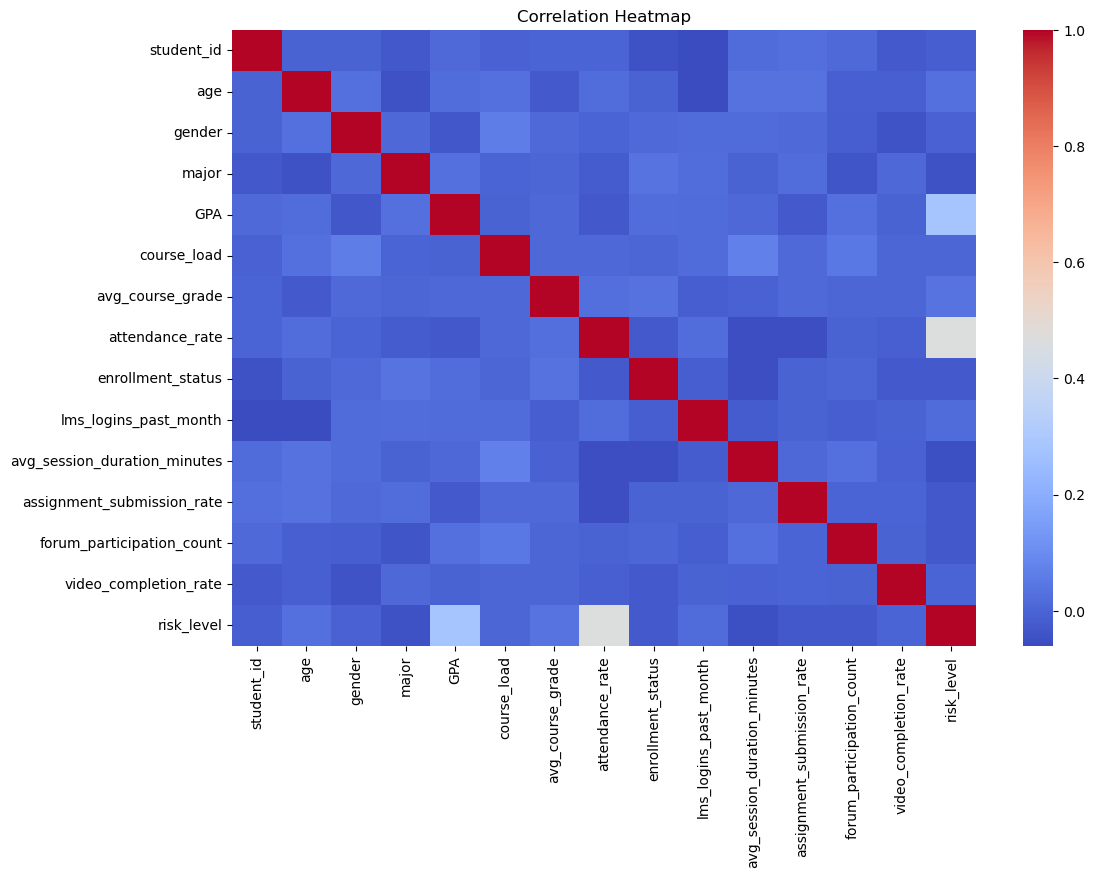

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [16]:
target_col=df.columns[-1]
target_col

'risk_level'

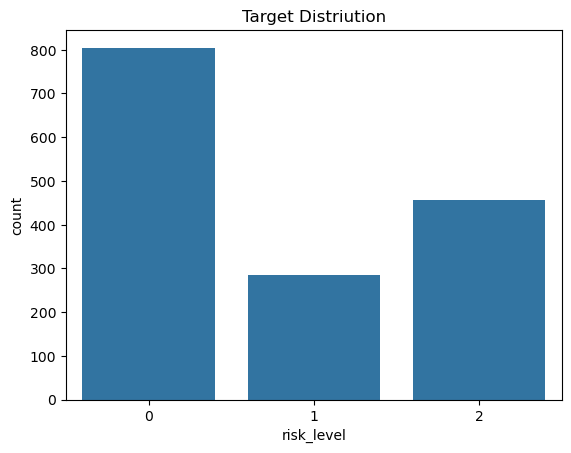

In [17]:
sns.countplot(x=df[target_col])
plt.title("Target Distriution")
plt.show()

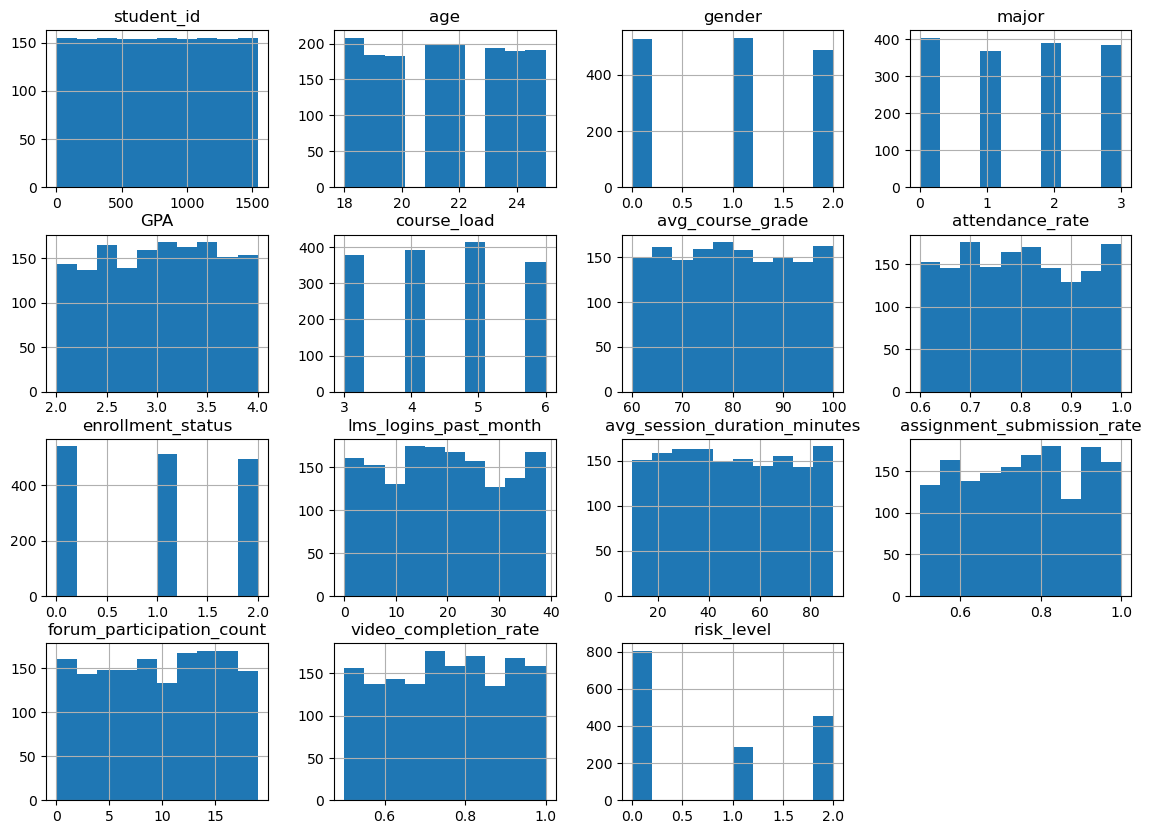

In [18]:
df.hist(figsize=(14,10))
plt.show()

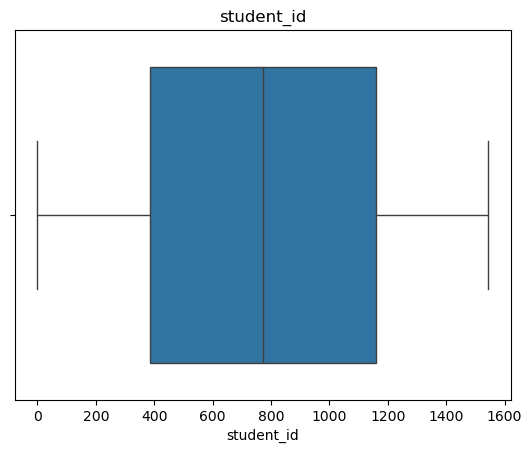

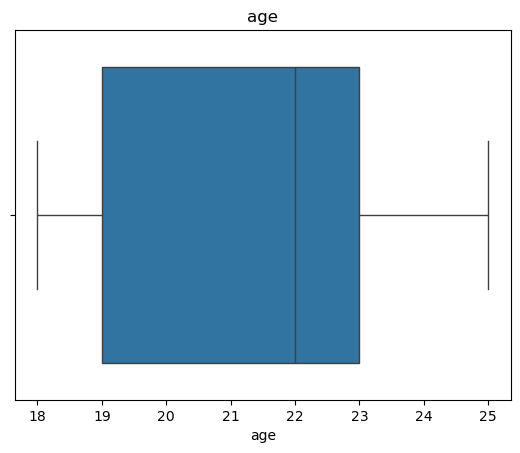

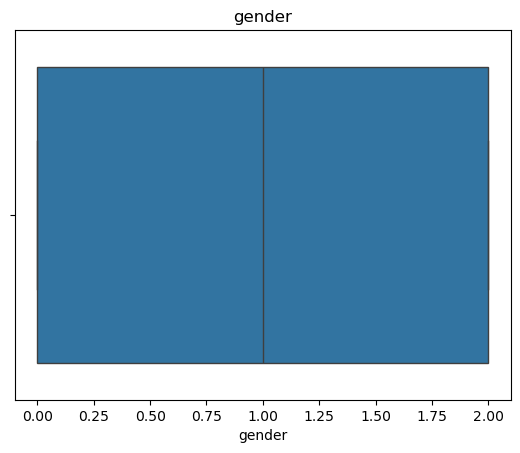

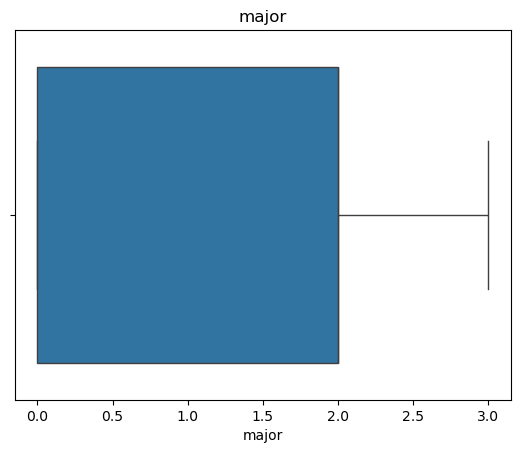

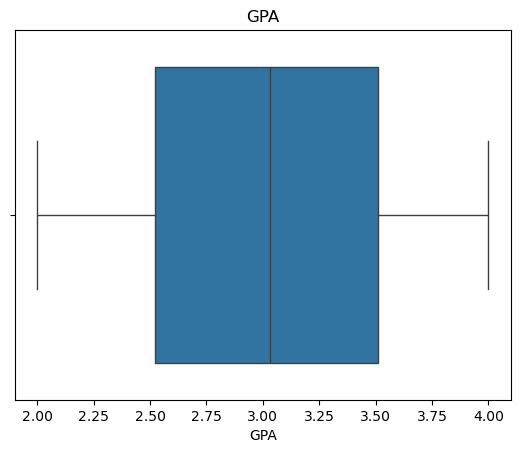

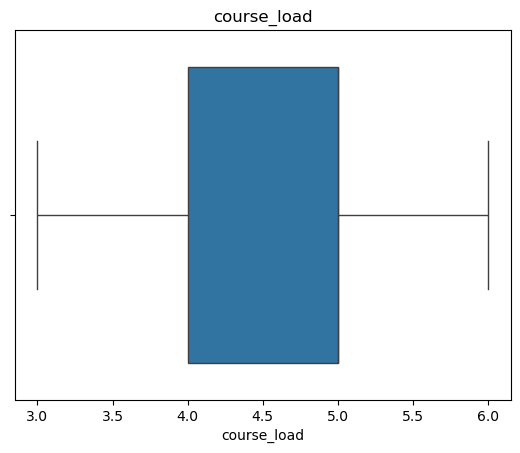

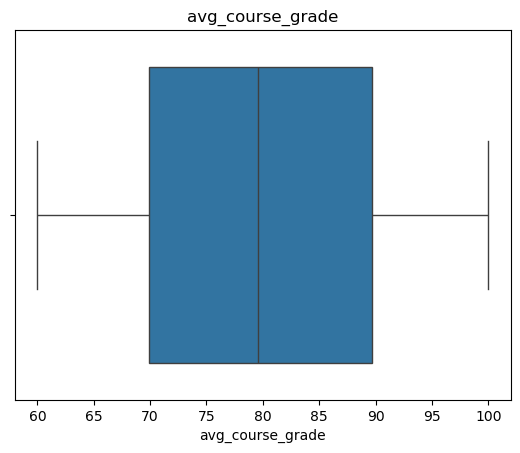

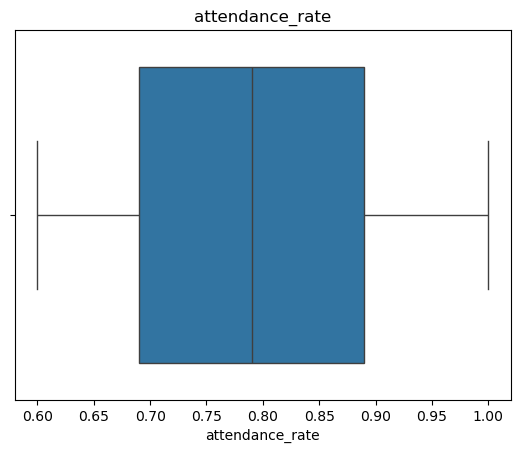

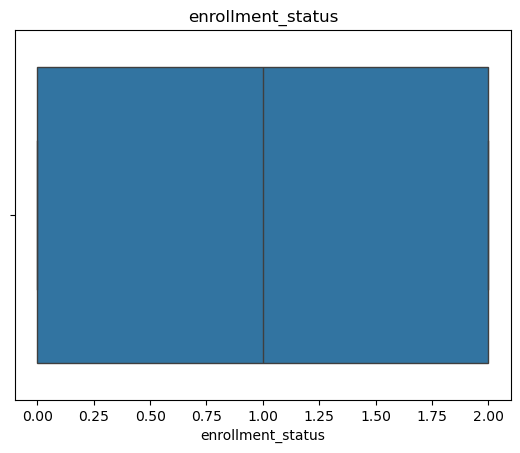

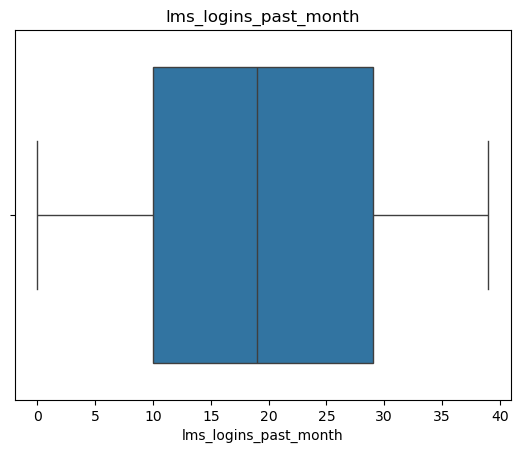

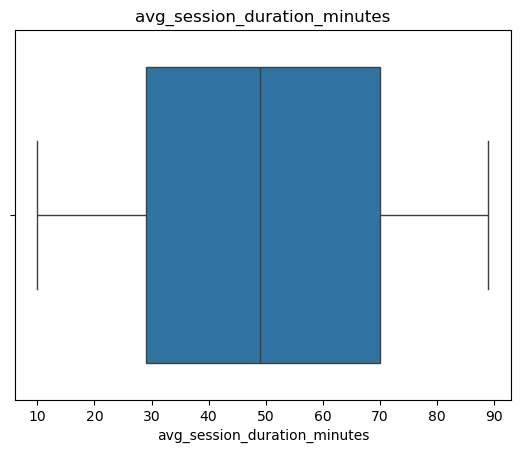

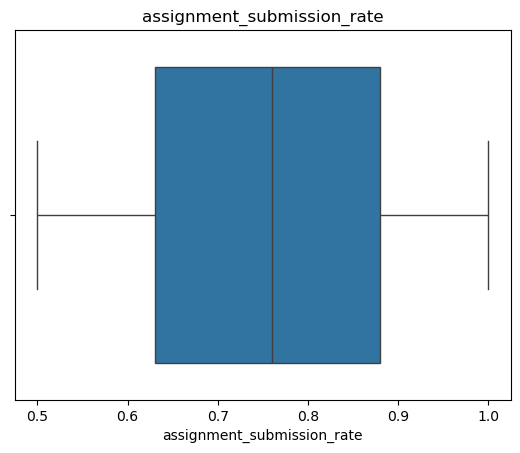

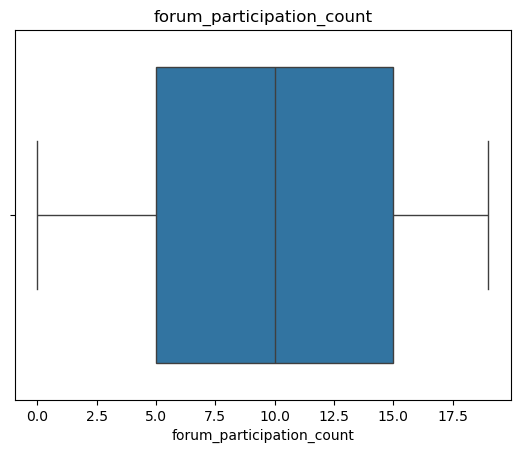

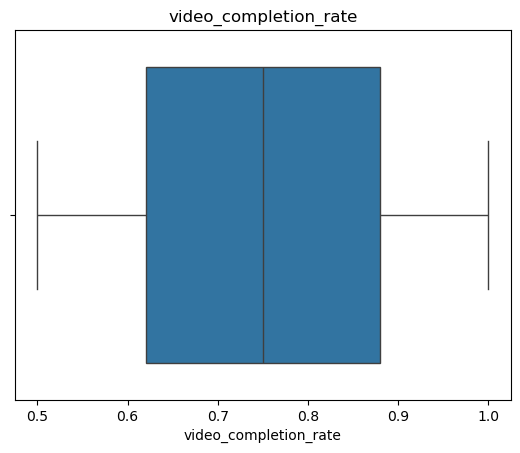

In [19]:
for col in df.columns[:-1]:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

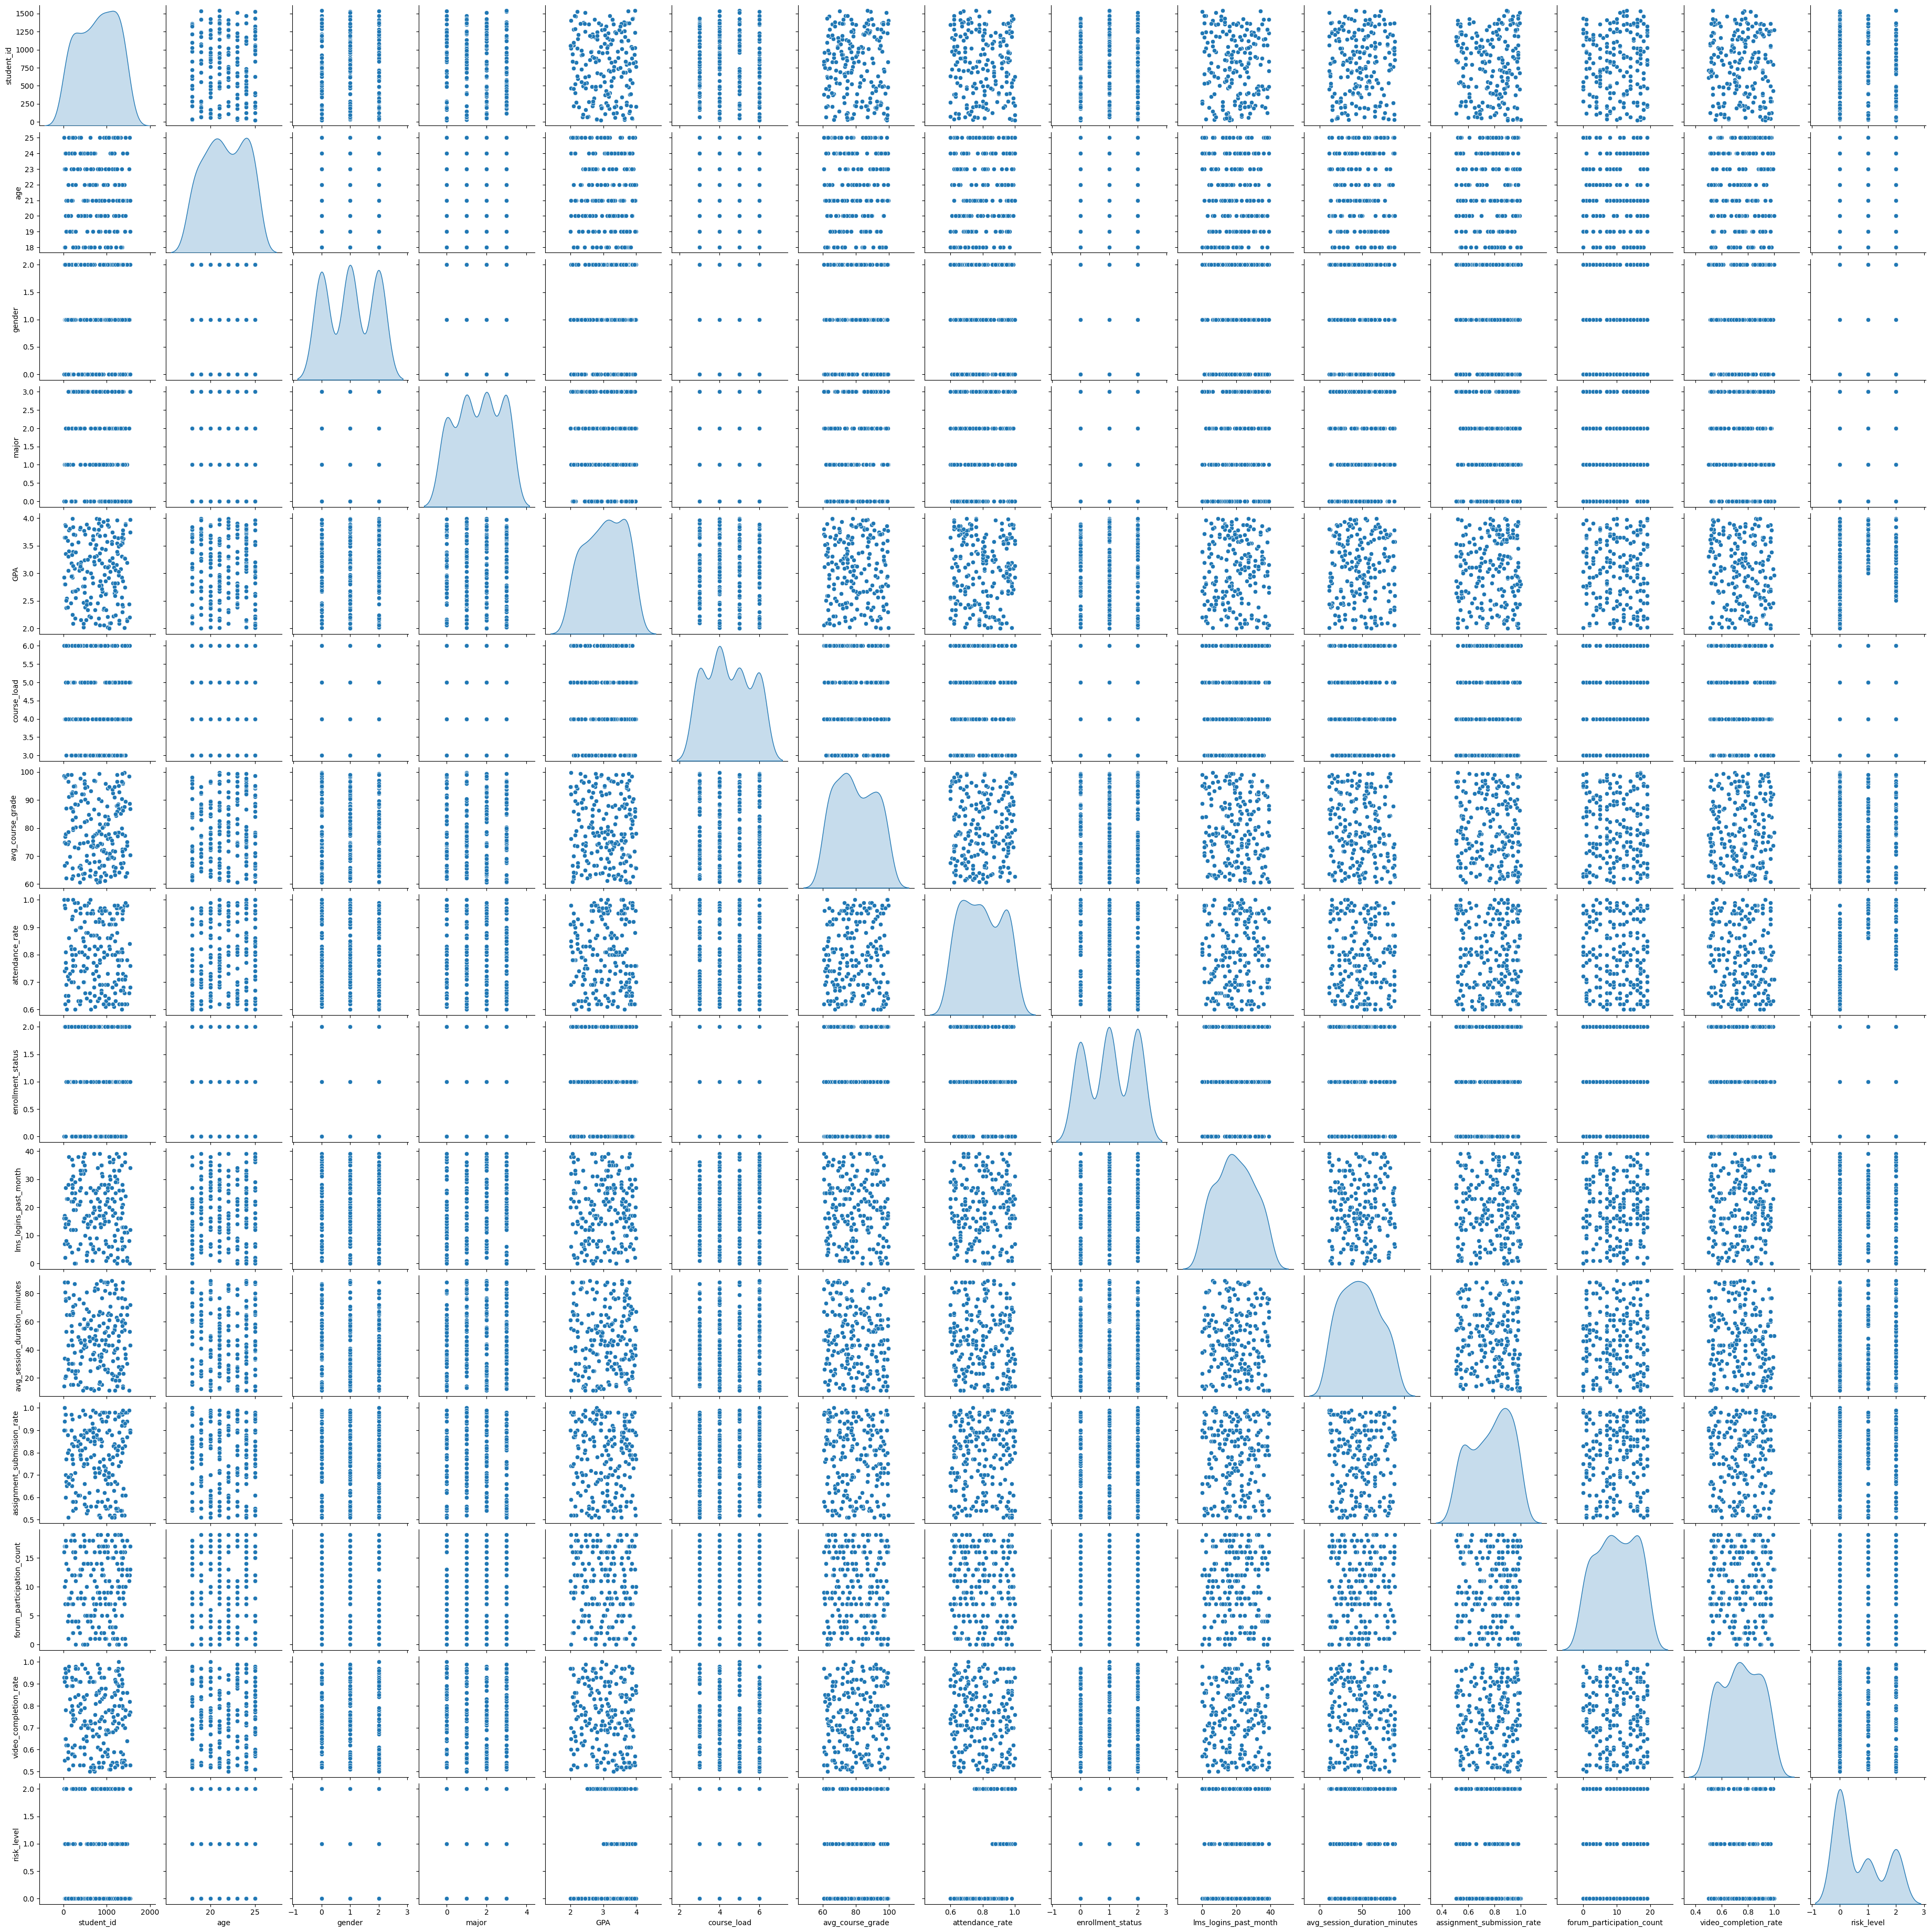

In [20]:
sns.pairplot(df.sample(min(200,len(df))),diag_kind="kde")
plt.show()

In [21]:
x=df.drop(target_col,axis=1)
y=df[target_col]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42,stratify=y)

In [23]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [24]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
accuracy_score(y_test,lr_pred)

0.7734627831715211

In [26]:
dt=DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
accuracy_score(y_test,dt_pred)

1.0

In [27]:
rf=RandomForestClassifier(n_estimators=300,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
accuracy_score(y_test,rf_pred)

0.9967637540453075

In [29]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       161
           1       1.00      0.98      0.99        57
           2       0.99      1.00      0.99        91

    accuracy                           1.00       309
   macro avg       1.00      0.99      1.00       309
weighted avg       1.00      1.00      1.00       309



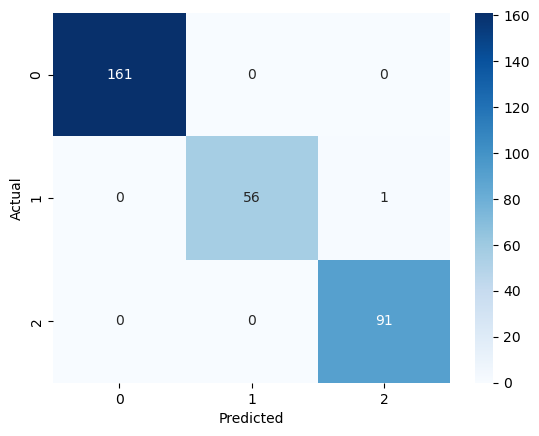

In [31]:
cm=confusion_matrix(y_test,rf_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
scores=cross_val_score(rf,x,y,cv=5)
scores.mean()

np.float64(0.9980582524271846)

In [34]:
rf.fit(x,y)
accuracy_score(y,rf.predict(x))

1.0

✅Project Summary